In [1]:
import linsolve
import tf_linsolve
import scipy
import tensorflow as tf
import numpy as np
import pylab as plt
%load_ext line_profiler

In [2]:
x = np.linspace(0, 2 * np.pi, 10000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
j = -x - 1j * x
k = np.cos(x) - 1j * x
data = {
    "g + h": g + h,
    "g + i": g + i,
    "i + h": i + h,
    "i + g + h": i + g + h,
    "k + j": k + j,
    "i + j": i + j,
}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [3]:
ls = linsolve.LinearSolver(data)
tfls = tf_linsolve.LinearSolver(data)

In [4]:
%time solution = ls.solve()

CPU times: user 6.64 ms, sys: 2.4 ms, total: 9.04 ms
Wall time: 2.95 ms


In [5]:
%time sol = tfls.solve()

CPU times: user 34.6 ms, sys: 20.6 ms, total: 55.2 ms
Wall time: 8.71 ms


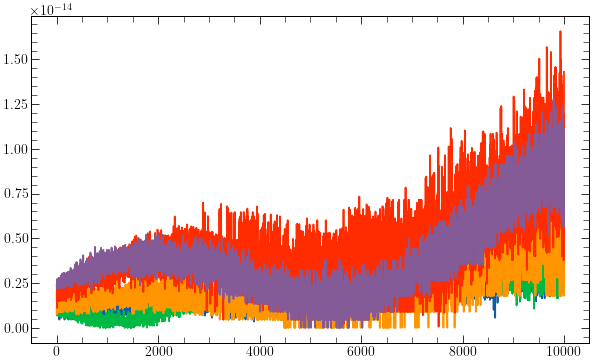

In [6]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Least-Squares Case

In [7]:
ls = linsolve.LinearSolver(data, wgts=wgts)
tfls = tf_linsolve.LinearSolver(data, wgts=wgts)

In [8]:
%time solution = ls.solve(mode='lsqr')

CPU times: user 562 ms, sys: 32.2 ms, total: 594 ms
Wall time: 660 ms


In [9]:
%time sol = tfls.solve(mode='lsqr', rcond=0)

CPU times: user 45.4 ms, sys: 14.1 ms, total: 59.5 ms
Wall time: 11.9 ms


In [10]:
%time sol = tfls.solve(mode='lsqr_stable', rcond=0)

CPU times: user 94.6 ms, sys: 16.1 ms, total: 111 ms
Wall time: 18.1 ms


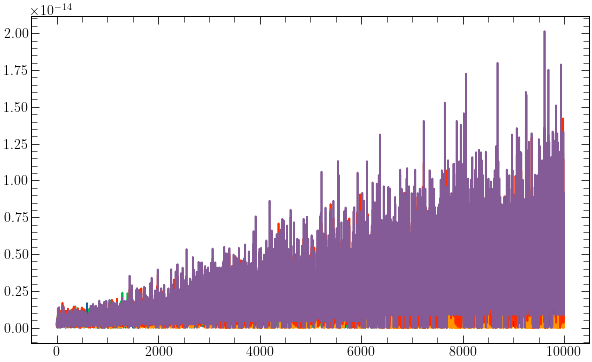

In [11]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Psuedo-inverse

In [12]:
%time solution = ls.solve()

CPU times: user 430 ms, sys: 65.3 ms, total: 495 ms
Wall time: 124 ms


In [13]:
%time sol = tfls.solve()

CPU times: user 284 ms, sys: 85.6 ms, total: 369 ms
Wall time: 56.6 ms


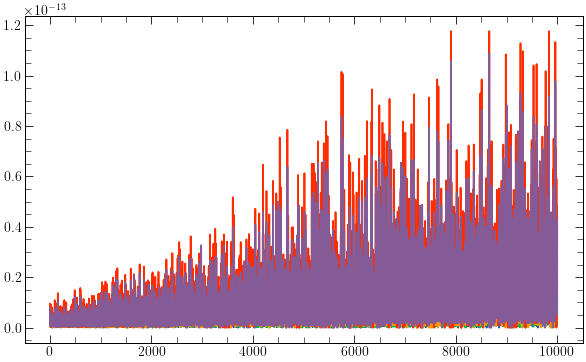

In [14]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Solve

In [15]:
%time solution = ls.solve(mode='solve')

CPU times: user 76.2 ms, sys: 9.81 ms, total: 86 ms
Wall time: 85 ms


In [16]:
%time sol = tfls.solve(mode='solve')

CPU times: user 84.9 ms, sys: 29.7 ms, total: 115 ms
Wall time: 20.4 ms


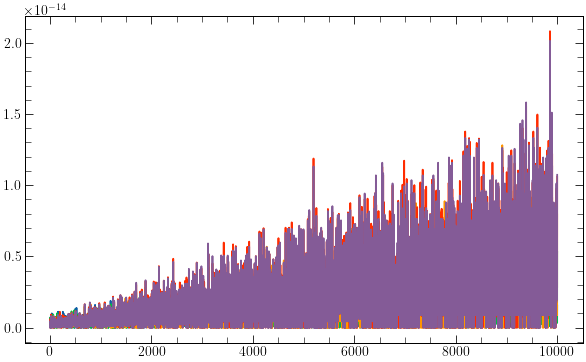

In [17]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

## Test LogProductSolver and LinProductSolver

In [18]:
x = np.linspace(0, 2 * np.pi, 10000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
j = -x - 1j * x
k = np.cos(x) - 1j * x
data = {
    "g * h": g * h,
    "g * i": g * i,
    "i * h": i * h,
    "i * g * h": i * g * h,
    "k * j": k * j,
    "i * j": i * j,
}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [19]:
ls = linsolve.LogProductSolver(data, wgts=wgts)
tfls = tf_linsolve.LogProductSolver(data, wgts=wgts)

/usr/local/anaconda3/lib/python3.8/site-packages/linsolve/linsolve.py:722: RuntimeWarning: divide by zero encountered in log
  dk = np.log(data[k])
/Users/tyler/Work/tf_linsolve/linsolve/tf_linsolve/tf_linsolve.py:757: RuntimeWarning: divide by zero encountered in log
  dk = np.log(data[k])


In [20]:
%timeit solution = ls.solve()

150 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%timeit sol = tfls.solve()

35.2 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
ls = linsolve.LinProductSolver(data, sol, wgts=wgts)
tfls = tf_linsolve.LinProductSolver(data, sol, wgts=wgts)

In [27]:
%time meta, sol = ls.solve_iteratively(mode='lsqr')

CPU times: user 314 ms, sys: 7.4 ms, total: 322 ms
Wall time: 320 ms


In [33]:
%time meta, sol = ls.solve_iteratively()

CPU times: user 114 ms, sys: 17.2 ms, total: 131 ms
Wall time: 130 ms


In [34]:
%time met, sol = tfls.solve_iteratively(mode='lsqr_stable')

CPU times: user 102 ms, sys: 20.4 ms, total: 122 ms
Wall time: 25.9 ms


In [35]:
%time met, sol = tfls.solve_iteratively()

CPU times: user 286 ms, sys: 95.7 ms, total: 382 ms
Wall time: 67.2 ms


##